## Neural Network and Machine Learning for Signal Processing Workshop for EST's internship 2018 

Author : Suradej Dunapummet
Advance Automation and Electr

Create : June, 2018

###  Lab 15 : Handwritten digit recognition 
Aims:

1.How to develop and evaluate a simple neural network called Multilayer Perceptron, MLP.

2.How to implement and evaluate a simple Convolutional Neural Network, CNN.
##### Import Library

In [49]:
import numpy as np
import matplotlib.pyplot as plt

### MNIST dataset
The MNIST problem is a dataset developed by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models on the handwritten digit classification problem.

The dataset was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). This is where the name for the dataset comes from, as the Modified NIST or MNIST dataset.

In [99]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


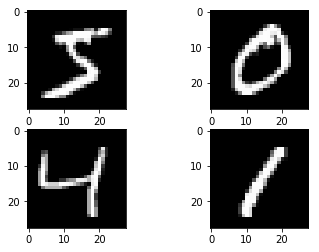

In [100]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

### reshape and normalize the input from 0-255 to 0-1

In [111]:
x_train = x_train.astype(np.float32).reshape((x_train.shape[0],28*28))/255.0
x_test = x_test.astype(np.float32).reshape((x_test.shape[0],28*28))/255.0

It is a digit recognition task. As such there are 10 digits (0 to 9) or 10 classes to predict. We can use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix.

In [105]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [106]:
y_train.shape

(60000, 10)

In [108]:
print("One hot vector looks like :",y_train[0])

One hot vector looks like : [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


To initialize the random number generator to a constant to ensure that the results of your script are reproducible.

In [103]:
seed = 7
np.random.seed(seed)

In [113]:
epochs = 10
batch_size = 64

# Multilayer Perceptron, MLP

In [101]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

Fully connected feedforward network 

Hidden node = 100

Activation function = sigmoid 

In [117]:
mlp = Sequential()
mlp.add(Dense (1000, input_dim = 784, activation = 'sigmoid'))
mlp.add(Dense (10, activation='sigmoid'))
mlp.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_29 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [118]:
mlp.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 26s 426us/step - loss: 2.2788 - acc: 0.1073
Epoch 2/10
60000/60000 [==============================] - 23s 379us/step - loss: 1.4164 - acc: 0.5426
Epoch 3/10
60000/60000 [==============================] - 22s 362us/step - loss: 0.7308 - acc: 0.8170
Epoch 4/10
60000/60000 [==============================] - 23s 383us/step - loss: 0.5519 - acc: 0.8530
Epoch 5/10
60000/60000 [==============================] - 24s 394us/step - loss: 0.4701 - acc: 0.87201s - loss: 
Epoch 6/10
60000/60000 [==============================] - 22s 375us/step - loss: 0.4251 - acc: 0.8810
Epoch 7/10
60000/60000 [==============================] - 24s 396us/step - loss: 0.3955 - acc: 0.8868
Epoch 8/10
60000/60000 [==============================] - 23s 378us/step - loss: 0.3751 - acc: 0.8923
Epoch 9/10
60000/60000 [==============================] - 22s 368us/step - loss: 0.3622 - acc: 0.8944
Epoch 10/10
60000/60000 [==============================] - 23s 385us/st

### Evaluate Multilayer percepton 

In [119]:
score = mlp.evaluate(x_test, y_test, verbose = 0)
print("Test accuracy:", score[1])

Test accuracy: 0.9057


# Convolutional Neural Network, CNN

In [126]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype(np.float32).reshape((x_train.shape[0],28,28,1))/255.0
x_test = x_test.astype(np.float32).reshape((x_test.shape[0],28,28,1))/255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [124]:
x_train.shape

(60000, 28, 28, 1)

In [121]:
from keras.layers import (Conv2D, MaxPooling2D, BatchNormalization, Activation, Flatten)

In [128]:
cnn = Sequential()
cnn.add( Conv2D (10, (3,3), padding='same', use_bias=False, data_format = 'channels_last', input_shape =(28,28,1)))
cnn.add( BatchNormalization(axis=-1))
cnn.add( Activation('relu'))
cnn.add( MaxPooling2D(pool_size=(2,2),data_format='channels_last'))
cnn.add(Dropout(0.2))
cnn.add(Flatten())
cnn.add( Dense(10, activation='softmax'))
cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 10)        90        
_________________________________________________________________
batch_normalization_13 (Batc (None, 28, 28, 10)        40        
_________________________________________________________________
activation_12 (Activation)   (None, 28, 28, 10)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 10)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1960)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                19610     
Total para

In [129]:
cnn.fit(x_train, y_train,batch_size=batch_size, epochs=epochs, shuffle=True,verbose=1)

Epoch 1/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.2941 - acc: 0.9090
Epoch 2/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.1293 - acc: 0.9608
Epoch 3/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1014 - acc: 0.9690
Epoch 4/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0870 - acc: 0.9728
Epoch 5/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0777 - acc: 0.9762
Epoch 6/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0736 - acc: 0.9770
Epoch 7/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0689 - acc: 0.9787
Epoch 8/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0650 - acc: 0.9797
Epoch 9/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0615 - acc: 0.9801
Epoch 10/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0612 - acc: 0.9803

## Evaluate CNN model 1

In [131]:
score = cnn.evaluate(x_test, y_test, verbose = 0)
print("Test accuracy:", score[1])

Test accuracy: 0.9799
